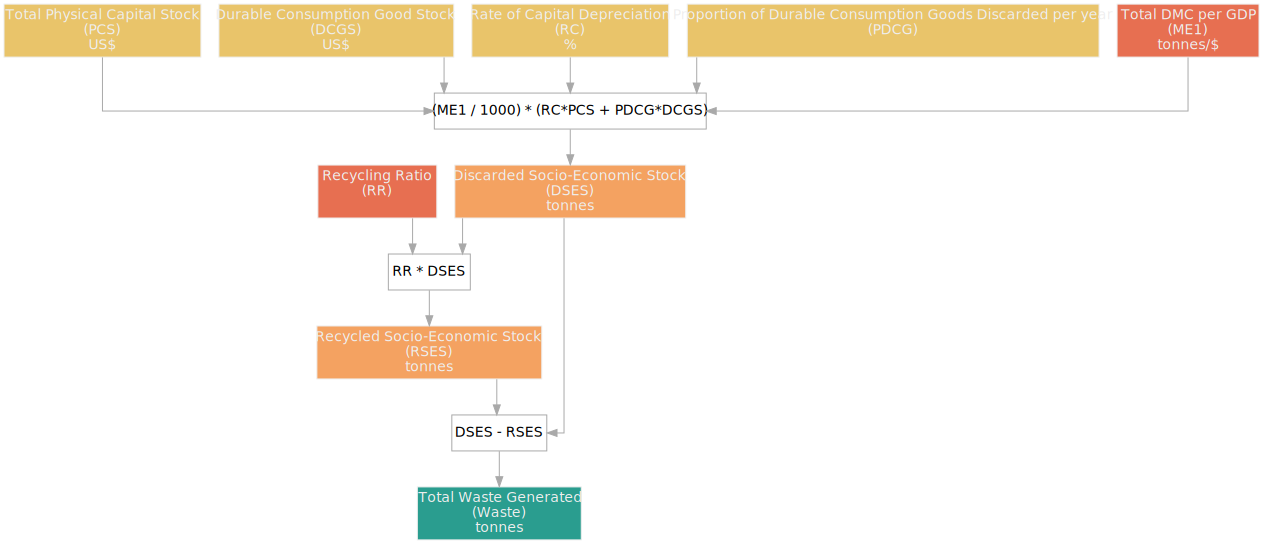

In [1]:
import numpy as np
from graphmodels.graphmodel import GraphModel

__publisher__ = 'Global Green Growth Institute'
__author__ = 'GGPM Team'
__model_lead__ = 'S. Gerrard'
__programmer__ = 'S. Zabrocki'

# Waste Generation Component
Waste_nodes = [{'type': 'parameter',
                'name': 'Total Physical Capital Stock',
                'unit': 'US$',
                'id': 'PCS'},

               {'type': 'parameter',
                'name': 'Durable Consumption Good Stock',
                'unit': 'US$',
                'id': 'DCGS'},

               {'type': 'parameter',
                'name': 'Rate of Capital Depreciation',
                'unit': '%',
                'id': 'RC'},

               {'type': 'parameter',
                'name': 'Proportion of Durable Consumption Goods Discarded per year',
                'unit': '',
                'id': 'PDCG'},

               {'type': 'variable',
                'name': 'Discarded Socio-Economic Stock',
                'unit': 'tonnes',
                'in': ['ME1', 'PCS', 'DCGS', 'RC', 'PDCG'],
                'computation': {'name': '(ME1 / 1000) * (RC*PCS + PDCG*DCGS)', 'formula': lambda X: (X['ME1'] / 1000)*(X['RC']*X['PCS'] + X['PDCG']*X['DCGS'])}, 'id': 'DSES'},

               {'type': 'input',
                'name': 'Recycling Ratio',
                'unit': '',
                'id': 'RR'},
               {'type': 'variable',
                'name': 'Recycled Socio-Economic Stock',
                'unit': 'tonnes',
                'in': ['DSES', 'RR'],
                'id': 'RSES',
                'computation': {'name': 'RR * DSES', 'formula': lambda X: X['DSES'] * X['RR']}, },
               {'type': 'output',
                'name': 'Total Waste Generated',
                'unit': 'tonnes',
                'in': ['DSES', 'RSES'],
                'id': 'Waste',
                'computation': {'name': 'DSES - RSES', 'formula': lambda X: X['DSES'] - X['RSES']}},
               {'type': 'input',
                'name': 'Total DMC per GDP',
                'unit': 'tonnes/$',
                'id': 'ME1', },
               ]
GraphModel(Waste_nodes).draw()

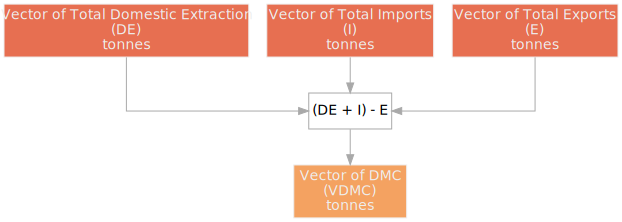

In [2]:
VDMC = [{'type': 'input',
         'name': 'Vector of Total Domestic Extraction',
         'unit': 'tonnes',
         'id': 'DE'},
        {'type': 'input',
         'name': 'Vector of Total Imports',
         'unit': 'tonnes',
         'id': 'I'},
        {'type': 'input',
         'name': 'Vector of Total Exports',
         'unit': 'tonnes',
         'id': 'E'},
        # Calculation of ME 1
        {'type': 'variable',
         'name': 'Vector of DMC',
         'unit': 'tonnes',
         'in': ['DE', 'I', 'E'],
         'computation': {'name': '(DE + I) - E', 'formula': lambda X: (X['DE'] + X['I']) - X['E']}, 'id': 'VDMC'},
        ]

GraphModel(VDMC).draw()

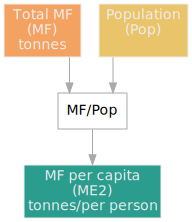

In [3]:
ME2_nodes = [{'type': 'variable',
              'name': 'Total MF',
              'unit': 'tonnes',
              'id': 'MF'},
             {'type': 'parameter',
              'name': 'Population',
              'unit': '',
              'id': 'Pop'},
             {'type': 'output',
              'name': 'MF per capita',
              'unit': 'tonnes/per person',
              'in': ['Pop', 'MF'],
              'id': 'ME2',
              'computation': {'name': 'MF/Pop', 'formula': lambda X: X['MF'] / X['Pop']}, }
             ]

GraphModel(ME2_nodes).draw()

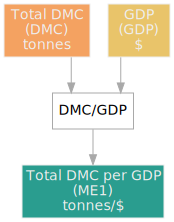

In [4]:
ME2_nodes = [
    {'type': 'variable',
     'name': 'Total DMC',
     'unit': 'tonnes',
     'id': 'DMC'},
    {'type': 'parameter',
     'name': 'GDP',
     'unit': '$',
     'id': 'GDP'},

    {'type': 'output',
     'name': 'Total DMC per GDP',
     'unit': 'tonnes/$',
     'in': ['DMC', 'GDP'],
     'id': 'ME1',
     'computation': {'name': 'DMC/GDP', 'formula': lambda X: X['DMC'] / X['GDP']*1000}, },
]
GraphModel(ME2_nodes).draw()

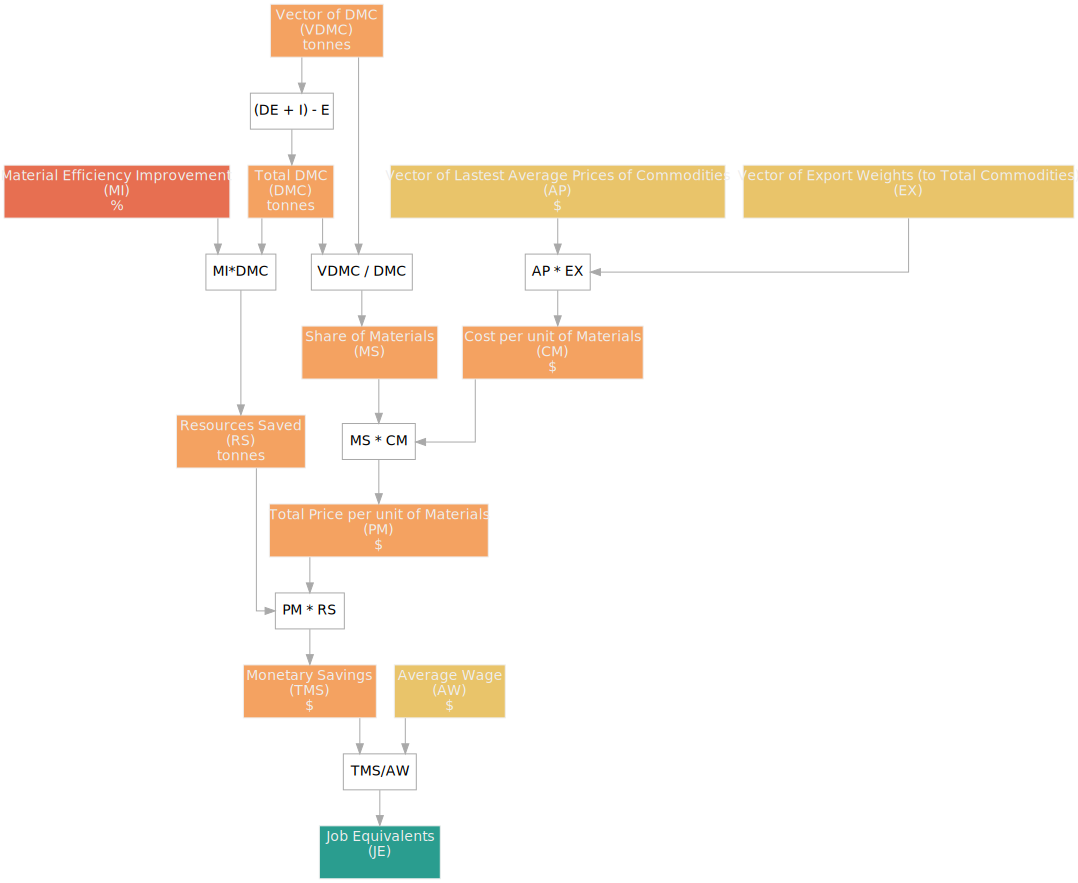

In [5]:
JE_nodes = [
{'type': 'variable',
 'name': 'Vector of DMC',
 'unit': 'tonnes',
 'id': 'VDMC'},
{'type': 'variable',
 'name': 'Total DMC',
 'unit': 'tonnes',
 'in': ['VDMC'],
 'computation': {'name': '(DE + I) - E', 'formula': lambda X: sum(X['VDMC'])}, 'id': 'DMC'},
# Calculation of ME 2
# Resource Efficiency Improvement Scenario
{'type': 'input',
    'name': 'Material Efficiency Improvement',
    'unit': '%',
    'id': 'MI'},
{'type': 'variable',
    'name': 'Resources Saved',
    'unit': 'tonnes',
    'in': ['MI', 'DMC'],
    'id': 'RS',
 'computation': {'name': 'MI*DMC', 'formula': lambda X: X['MI'] * X['DMC 1'], }},
# Calculate share of each material in DMC
{'type': 'variable',
    'name': 'Share of Materials',
    'unit': '',
 'in': ['VDMC', 'DMC'],
 'computation': {'name': 'VDMC / DMC', 'formula': lambda X: X['VDMC'] / X['DMC']}, 'id': 'MS'},

{'type': 'parameter',
    'name': 'Vector of Lastest Average Prices of Commodities',
    'unit': '$',
    'id': 'AP'},

{'type': 'parameter',
    'name': 'Vector of Export Weights (to Total Commodities)',
    'unit': '',
    'id': 'EX'},

{'type': 'variable',
 'name': 'Cost per unit of Materials',
 'unit': '$',
 'in': ['AP', 'EX'],
 'computation': {'name': 'AP * EX', 'formula': lambda X: X['AP'] * X['EX']}, 'id': 'CM'},

{'type': 'variable',
    'name': 'Total Price per unit of Materials',
    'unit': '$',
 'in': ['CM', 'MS'],
 'computation': {'name': 'MS * CM', 'formula': lambda X: X['MS'] * X['CM']}, 'id': 'PM'},

{'type': 'variable',
    'name': 'Monetary Savings',
    'unit': '$',
 'in': ['PM', 'RS'],
 'computation': {'name': 'PM * RS', 'formula': lambda X: X['PM'].sum() * X['RS']}, 'id': 'TMS'},

{'type': 'parameter',
    'name': 'Average Wage',
    'unit': '$',
    'id': 'AW'},

{'type': 'output',
    'name': 'Job Equivalents',
    'unit': '',
 'in': ['AW', 'TMS'],
 'computation': {'name': 'TMS/AW', 'formula': lambda X: X['TMS'] / X['AW']}, 'id': 'JE'},

{'type': 'variable',
    'name': 'Total DMC',
    'unit': 'tonnes',
    'in': ['VDMC'],
 'computation': {'name': '(DE + I) - E', 'formula': lambda X: sum(X['VDMC'])}, 'id': 'DMC'},
]

GraphModel(JE_nodes).draw()